# <font color="darkblue">Data Analysis and Visualization of Pokemon Gen 1 to 7</font>
Matthew C. Romero  
Einstein - MSDS2021  
matthewromero.msds2021@aim.edu  

Link to public dataset used in this notebook: https://www.kaggle.com/terminus7/pokemon-challenge#pokemon.csv

# <font color="darkblue">Introduction</font>  
Kids and adults of all ages have more often than not encounter the wonderful world of Pokemon. A Pokemon, or Pocket Monster, is a creature of all shapes and different sizes that live, play, train, and fight alongside humans. Due to the undeniable success of the anime series, a game was developed and thus different versions of Pokemon was conceived. As of this writing, there are around 800 available pokemons that you can catch and collect.  

In this notebook, we will be exploring and analyzing the different species of pokemon and see each one of them is unique and wonderful. 


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's first see the data that we will be working with.

In [52]:
df = pd.read_csv('pokemon.csv')
df.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


All Pokemons have typing. Others are grass, fire, flying, and so on. It's important to note these typings some pokemons are weaker than others because of their typing. For example, fire type pokemons are weaker than water type pokemons, grass type are weak against fire types, electric types are weak against ground types, and so on. Some pokemons have 2 typings, while others only have one. We see several entries under the column `Type 2` with NaN values. These correspond to pokemons who are single-types. Let's fix the column to remove the `NaN` values. 

In [48]:
df['Type 2'].fillna("", inplace = True)
df.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,,44,48,65,50,64,43,1,False


Let's now start to visualize the data that we have fixed. Some few things we can try to find out is to see how many pokemons have duo-typing and single-typing. 

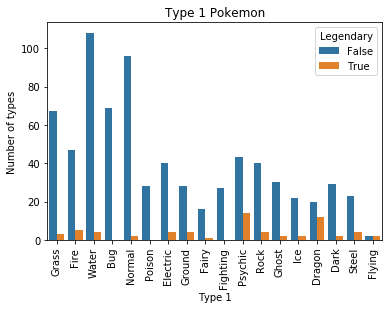

In [50]:
ax = sns.countplot(x = 'Type 1', data = df, hue = 'Legendary')
plt.xticks(rotation = 90)
plt.xlabel('Type 1')
plt.ylabel('Number of types')
plt.title('Type 1 Pokemon');

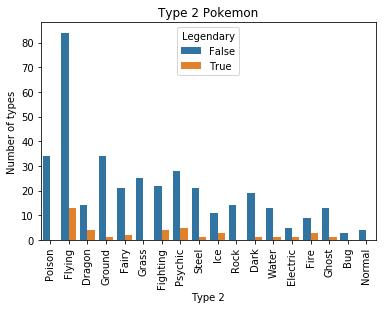

In [53]:
ax = sns.countplot(x = 'Type 2', data = df, hue = 'Legendary')
plt.xticks(rotation = 90)
plt.xlabel('Type 2')
plt.ylabel('Number of types')
plt.title('Type 2 Pokemon');

As we can see in our graphs, there are plenty pokemons that have the types of grass, fire, water, and bug in type 1. On the second graph, we see that there are plenty of pokemons that have poison and flying as their 2nd types. When you battle pokemon in the forest, you can expect that majority of the pokemon you will encounter will most probably have the types shown above. Be sure to have counter-types of these in your team!  

Now by putting them together, we see the most common pokemon type:

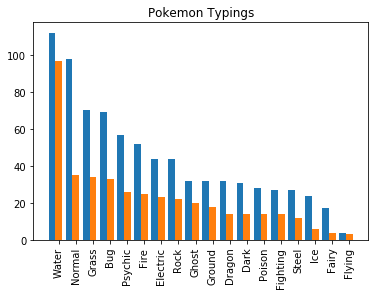

In [76]:
type1 = [df['Type 1'].value_counts()[key] for key in df['Type 1'].value_counts().index]
type2 = [df['Type 2'].value_counts()[key] for key in df['Type 2'].value_counts().index]
index_type1 = np.arange(len(df['Type 1'].value_counts().index))
barwidth = 0.4
plt.bar(index_type1, type1, barwidth)
plt.bar(index_type1 + barwidth, type2, barwidth)
plt.gca().set_xticklabels(df['Type 1'].value_counts().index);
plt.gca().set_xticks(index_type1 + barwidth);
plt.xticks(rotation = 90);
plt.title('Pokemon Typings');

The blue bars represent Type 1 and orange represents Type 2. We can see that the most common type of pokemon across all generations is water type. There are plenty of pokemon out there that either lives in the sea or can shoot waterfalls!

Up next, let's see how these types fare against each other. We'll try to see the stats associated with the typings of each pokemon. To do this, we will visualize the typings and the stats to compare.

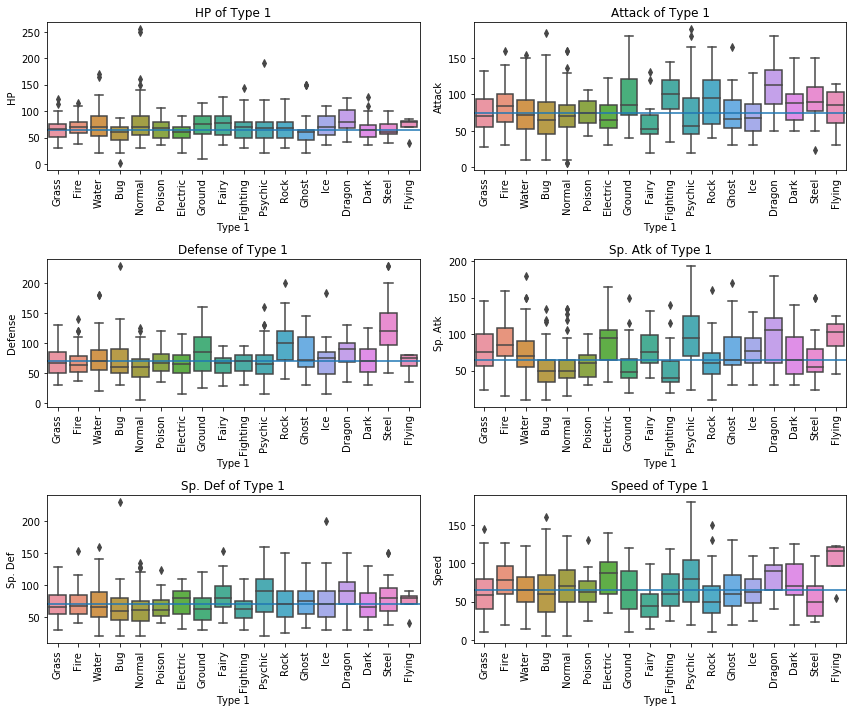

In [109]:
plt.figure(figsize = (12, 10))
pokestats = df.columns[4:10]
#pokestats
for i, stat in enumerate(pokestats):
    title = '{pokestats} of Type 1'.format(pokestats = stat) 
    
    plt.subplot(3, 2, i+1)
    plt.title(title)
    plt.xticks(rotation = 90)
    sns.boxplot(x = 'Type 1', y = stat, data = df)
    plt.axhline(df[stat].median())
    
plt.tight_layout()
plt.show()

Looking at the graphs, this will give you an idea of what pokemon to put in your team if you want to be sucessful. For example, if you want to have a pokemon that fleshes out high power of attacks, look at the Attack boxplot graph and look for the type that has a high attack across all pokemons. For pokemon with single types, you can choose Ground, Fighting, or Dragon pokemon as your main attacker. If you want to tank out damage and survive for as long as possible in battles, looking at the Defense boxplot, steel type pokemon are the best for being your frontliners. If you want to be the first to attack always, check out the speed boxplot. You will see that Flying pokemon are the fastest. Get them in your team if you want to be speedy and agile!

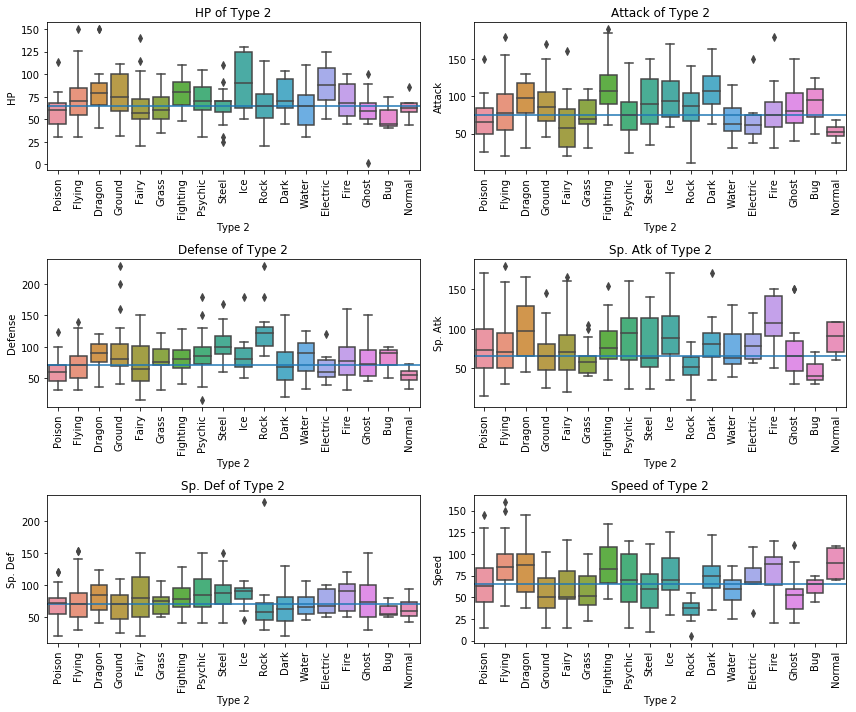

In [110]:
plt.figure(figsize = (12, 10))
pokestats = df.columns[4:10]
#pokestats
for i, stat in enumerate(pokestats):
    title = '{pokestats} of Type 2'.format(pokestats = stat) 
    
    plt.subplot(3, 2, i+1)
    plt.title(title)
    plt.xticks(rotation = 90)
    sns.boxplot(x = 'Type 2', y = stat, data = df)
    plt.axhline(df[stat].median())
    
plt.tight_layout()
plt.show()

Here in Type 2, we employ the same visual analysis. It seems though that the Dragon type pokemon outshine the other types. Dragon types are always way above the average comparing to the other types. Maybe it would be good to have an all-Dragon team? 

Let's look at specific types and see how they perform agains each other. For this analysis, we will make water types fight agains fire types.

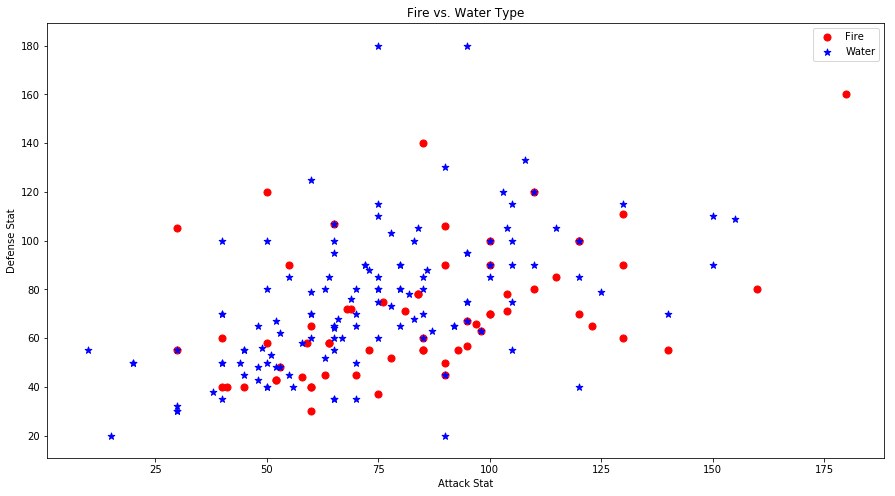

In [144]:
plt.figure(figsize = (15, 8))
firetype1 = df[(df['Type 1']=='Fire') | ((df['Type 2'])=="Fire")]
#firetype2 = df[(df['Type 2'] == 'Fire')]
watertype1 = df[(df['Type 1']=='Water') | ((df['Type 2'])=="Water")]
#watertype2 = df[(df['Type 2'] == 'Water')]
#total_fire = firetype1 + firetype2
#total_water = watertype1 + watertype2

plt.scatter(firetype1.Attack, 
            firetype1.Defense, 
            color = 'Red', 
            label = 'Fire', 
            s = 50)

plt.scatter(watertype1.Attack, 
            watertype1.Defense, 
            color = 'blue', 
            label = 'Water', 
            s = 50, 
            marker = '*')

plt.xlabel('Attack Stat')
plt.ylabel('Defense Stat')
plt.title('Fire vs. Water Type')
plt.legend()
plt.show()

What does this scatter plot tell us? It appears that fire types have high attack stats against water types. However, if you can see from the plotting above, water types tend to have higher defenses against fire types. This puts fire types at a disadvantage against water types. In the real world, water takes out fire. This also holds true in the pokemon world. When faced with a wild pokemon in the seas or ponds, make sure to not use a fire type! 

In these last few parts, let's just who the strongest pokemon are so you could have an idea of who you might want in your team. To get the strongest pokemon, we add their stats and arrange them in desccending order.

In [155]:
df['total_stats'] = df.apply(lambda sumrow: sumrow['Attack'] + 
                             sumrow['Defense'] + 
                             sumrow['Sp. Atk'] +
                             sumrow['Sp. Def'] +
                             sumrow['Speed'] +
                             sumrow['HP'], axis = 1)
df2 = df
df2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,5,Charmander,Fire,,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


In [159]:
asc_strongest = df2.sort_values(by = 'total_stats', ascending = False)
asc_strongest.drop_duplicates(subset = ['Type 1'], keep = 'first' )
asc_strongest.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_stats
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
164,165,Mega Mewtwo Y,Psychic,,106,150,70,194,120,140,1,True,780
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780
422,423,Primal Kyogre,Water,,100,150,90,180,160,90,3,True,770
424,425,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770
552,553,Arceus,Normal,,120,120,120,120,120,120,4,True,720
712,713,Kyurem White Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True,700
711,712,Kyurem Black Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True,700
409,410,Mega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False,700
413,414,Mega Metagross,Steel,Psychic,80,145,150,105,110,110,3,False,700


We see here the top 10 strongest pokemon. However, majority of the top 10's are Legendaries. In the pokemon world, legendaries are almost impossible to own especially if you are an ordinary trainer. Let's exclude the legendaries for this data frame.

In [166]:
legendary = asc_strongest[asc_strongest['Legendary'] == True].index
asc_strongest.drop(legendary, inplace = True)
asc_strongest.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_stats
409,410,Mega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False,700
413,414,Mega Metagross,Steel,Psychic,80,145,150,105,110,110,3,False,700
494,495,Mega Garchomp,Dragon,Ground,108,170,115,120,95,92,4,False,700
268,269,Mega Tyranitar,Rock,Dark,100,164,150,95,120,71,2,False,700
313,314,Slaking,Normal,,150,160,100,95,65,100,3,False,670
141,142,Mega Gyarados,Water,Dark,95,155,109,70,130,81,1,False,640
283,284,Mega Swampert,Water,Ground,100,150,110,95,110,70,3,False,635
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
279,280,Mega Blaziken,Fire,Fighting,80,160,80,130,80,100,3,False,630


In [171]:
asc_strongest.set_index('#')
asc_strongest[['Name', 'total_stats']].head(10)

,Name,total_stats
409,Mega Salamence,700
413,Mega Metagross,700
494,Mega Garchomp,700
268,Mega Tyranitar,700
313,Slaking,670
141,Mega Gyarados,640
283,Mega Swampert,635
7,Mega Charizard X,634
8,Mega Charizard Y,634
279,Mega Blaziken,630


We know see here the top 10 strongest pokemon that aren't legendaries. Legendaries are mythical creatures in the first place and they are strong to begin with.  

Seeing all these analysis, I encourage you to play around with the variables, plots, and graphs. Whether you are a pokemon trainer or just an ordinary person looking around, I hope you can have an appreciation of how this simple dataset can produce these wonderful graphs and analysis.  

Gotta catch 'em all!

#### Sources
1. https://seaborn.pydata.org/tutorial/color_palettes.html  
2. https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.gca.html  
3. For the boxplots, I'd like to give due recognition to: https://www.kaggle.com/casuru/pokemon-analysis  
4. https://stackoverflow.com/questions/19800534/how-to-plot-two-scatter-plots-on-the-same-chart  
5. https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
6. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html